In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
df = pd.read_csv("C:/Users/frede/OneDrive/Dokumenter/6_semester/Bachelor/github/frederikt0ft-ROTV-modeling-and-control/simulations/Simulation_data_1.csv")
display(df)

,acc_x,acc_y,acc_z,vel_x,vel_y,vel_z,ang_acc_roll,ang_acc_pitch,ang_acc_yaw,ang_vel_roll,...,yaw,u1,u2,u3,x1,x2,x3,x4,x5,x6
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,-19.999989,0.000000,0.000000,0.000000,2.040000,0.000000,0.0,0.0,0.000000,0.000000
1,3.758771,-1.36808,0.000000,0.018794,-0.006840,0.000000,0.0,0.000000,0.0,0.0,...,-19.999989,0.000000,0.000000,0.000000,2.040003,0.000000,0.0,0.0,0.000000,0.000000
2,3.758771,-1.36808,0.000000,0.037588,-0.013681,0.000000,0.0,0.000000,0.0,0.0,...,-19.999989,0.000000,0.000000,0.000000,2.040000,0.000000,0.0,0.0,0.000000,0.000000
3,3.758770,-1.36808,0.000000,0.056382,-0.020521,0.000000,0.0,0.000000,0.0,0.0,...,-19.999989,0.000000,0.000000,0.000000,2.040003,0.000000,0.0,0.0,0.000000,0.000000
4,3.758770,-1.36808,0.000000,0.075175,-0.027362,0.000000,0.0,0.000000,0.0,0.0,...,-19.999989,0.000000,0.000000,0.000000,2.040000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,0.000000,0.00000,-0.020999,3.740093,-1.361280,0.154766,0.0,-0.001243,0.0,0.0,...,-19.999989,3.392946,3.393131,-0.591204,2.011801,0.154766,0.0,0.0,0.064074,0.026499
4196,0.000000,0.00000,-0.019833,3.740093,-1.361280,0.154667,0.0,-0.001061,0.0,0.0,...,-19.999989,3.253827,3.253998,-0.626989,2.011884,0.154667,0.0,0.0,0.064224,0.026803
4197,0.000000,0.00000,-0.019193,3.740093,-1.361280,0.154571,0.0,0.000000,0.0,0.0,...,-19.999989,3.187997,3.188152,-0.664484,2.011968,0.154571,0.0,0.0,0.064361,0.027017
4198,0.000000,0.00000,-0.019294,3.740093,-1.361280,0.154475,0.0,0.000000,0.0,0.0,...,-19.999989,3.194335,3.194470,-0.650577,2.012053,0.154475,0.0,0.0,0.064511,0.027267


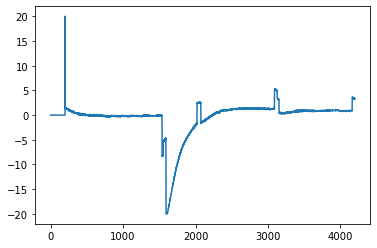

In [5]:
plt.plot(df["u1"])

# State space representation

#### Define symbols

In [16]:
import sympy as sy
from sympy import *
m, g, theta, rho, Vol, S1, S2, S3, S4, u, x1, x2, x3, x4, x5, x6, dh1,dh2, dr1,dr2,dp1,dp2 = symbols("m g theta rho Vol S1 S2 S3 S4 u x1 x2 x3 x4 x5 x6 dh1 dh2 dr1 dr2 dp1 dp2")
u1, u2, u3, r1, Iyx, Ixz, Iyz, Zw, xG, dg, db, d1, d2, d3, d4 = symbols ("u1 u2 u3 r1 Iyx Ixz Iyz Zw xG dg db d1 d2 d3 d4")
x2d, x4d, x6d, Ix, Kp, Ixy, Iy, Mq = symbols("x2d x4d x6d Ix Kp Ixy Iy Mq")

#### Force equations

In [17]:
#Heave equation
damping_h = dh1*x2+dh2*x2d
F1 = -damping_h -m*g*cos(x5) + rho*Vol*g*cos(x5) + 2*(1/2*rho*1/8*x5*S1*(x2**2+u**2) + 1/2*rho*1/8*x5*S3*(x2**2+u**2)+1/2*rho*1/8*(x5-u3)*S4*(x2**2+u**2)) + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)+1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2) - u*m*x6
#Roll equation
damping_r = dr1*x4+dr2*x4d
F2 = -damping_r + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)*r1 - 1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2)*r1 + x6*(Iyx*x6-Ixz*x4)
#Pitch equation
damping_p = dp1*x6+dp2*x6d
F3 = -damping_p -m*g*dg*cos(x5) + db*rho*Vol*g*cos(x5) + 2*1/2*rho*1/8*x5*S1*(x2**2+u**2)*d1 + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)*d2 + 1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2)*d2 + 2*1/2*rho*1/8*x5*S3*(x2**2+u**2)*d3 + 2*1/2*rho*1/8*(x5-u3)*S4*(x2**2+u**2)*d4 + u*m*xG*x6 + x4*(Iyz*x6+Ixz*x4)+Zw*x2*u

In [18]:
#Heave equation
damping_h = -dh1*x2-dh2*(x2**2)
F1 = damping_h -m*g*sin(x5) + rho*Vol*g*sin(x5) + 2*(1/2*rho*1/8*x5*S1*(x2**2+u**2) + 1/2*rho*1/8*x5*S3*(x2**2+u**2)+1/2*rho*1/8*(x5-u3)*S4*(x2**2+u**2)) + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)+1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2) - u*m*x6
#Roll equation
damping_r = -dr1*x4-dr2*(x4**2)
F2 = damping_r + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)*r1 - 1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2)*r1 + x6*(Iyx*x6-Ixz*x4)
#Pitch equation
damping_p = -dp1*x6-dp2*(x6**2)
F3 = damping_p -m*g*dg*sin(x5) + db*rho*Vol*g*sin(x5) + 2*1/2*rho*1/8*x5*S1*(x2**2+u**2)*d1 + 1/2*rho*1/8*(x5-u1)*S2*(x2**2+u**2)*d2 + 1/2*rho*1/8*(x5-u2)*S2*(x2**2+u**2)*d2 + 2*1/2*rho*1/8*x5*S3*(x2**2+u**2)*d3 + 2*1/2*rho*1/8*(x5-u3)*S4*(x2**2+u**2)*d4 + u*m*xG*x6 + x4*(Iyz*x6+Ixz*x4)+Zw*x2*u

#### M*a equations

In [19]:
#Heave mass-acceleration product
Ma1 = x2d*(m+Zw) - x6d*m*xG
#Roll mass-acceleration product
Ma2 = x4d*(Ix+Kp) - x6d*Ixy
#Pitch mass-acceleration product
Ma3 = -x2d*m*xG - x4d*Ixy + x6d*(Iy+Mq)

#Define equations
eq1 = sy.Eq(F1, Ma1)
eq2 = sy.Eq(F2, Ma2)
eq3 = sy.Eq(F3, Ma3)

#### Solving for x2d, x4d and x6d - little slow

In [20]:
#
r = sy.solve((eq1,eq2,eq3),(x2d,x4d,x6d))

r_list = list(r.items())
"""
print("---------------------------------------------X2D-------------------------------------------")
print(str(r_list[0]))
print("---------------------------------------------X4D-------------------------------------------")
print(str(r_list[1]))
print("---------------------------------------------X6D-------------------------------------------")
print(str(r_list[2]))
"""

'\nprint("---------------------------------------------X2D-------------------------------------------")\nprint(str(r_list[0]))\nprint("---------------------------------------------X4D-------------------------------------------")\nprint(str(r_list[1]))\nprint("---------------------------------------------X6D-------------------------------------------")\nprint(str(r_list[2]))\n'

#### Define x2d,x4d and x6d using sin

In [21]:
x2d = -16.0*Ix*Ixz*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S1*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Iy*S2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Iy*S2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Iy*S2*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Iy*S2*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S2*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S3*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*Iy*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*Iy*S4*rho*u3*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Iy*S4*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iy*Vol*g*rho*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*g*m*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Iy*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S1*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Mq*S2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Mq*S2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Mq*S2*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*Mq*S2*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S2*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S3*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*Mq*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*Mq*S4*rho*u3*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*Mq*S4*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Mq*Vol*g*rho*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*g*m*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Mq*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*d1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*d1*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*d2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u1*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u2*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*d2*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*d3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*d3*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*d4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*d4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*d4*m*rho*u3*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*d4*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*db*g*m*rho*xG*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dg*g*m**2*xG*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp1*m*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp2*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*m**2*u*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S1*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy**2*S2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy**2*S2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy**2*S2*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy**2*S2*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S2*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S3*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy**2*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy**2*S4*rho*u3*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy**2*S4*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy**2*Vol*g*rho*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*g*m*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy**2*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*r1*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2*m*r1*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*r1*rho*u1*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2*m*r1*rho*u2*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr1*m*x4*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr2*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*m*x4**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S1*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*Kp*S2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*Kp*S2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*Kp*S2*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*Kp*S2*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S2*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S3*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Iy*Kp*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Iy*Kp*S4*rho*u3*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Iy*Kp*S4*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Kp*Vol*g*rho*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*g*m*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Kp*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*m*x4*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S1*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*Mq*S2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*Mq*S2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*Mq*S2*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*Mq*S2*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S2*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S3*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*Mq*S4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*Mq*S4*rho*u3*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*Mq*S4*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Mq*Vol*g*rho*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*dh1*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*dh2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*g*m*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Mq*m*u*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*d1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*d1*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*d2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u1*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u2*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*d2*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*d3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*d3*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*d4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*d4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*d4*m*rho*u3*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*d4*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*db*g*m*rho*xG*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dg*g*m**2*xG*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp1*m*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp2*m*x6**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*m**2*u*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

In [22]:
x4d = -16.0*Ixy*Ixz*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Ixz*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*Zw*d1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*Zw*d1*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*d1*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*d1*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S1*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*Zw*d2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*Zw*d2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*Zw*d2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*Zw*d2*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*Zw*d2*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*Zw*d2*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*d2*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*d2*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*d2*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*d2*m*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*d2*m*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*d2*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*rho*u1*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*rho*u2*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S2*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*Zw*d3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*Zw*d3*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*d3*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*d3*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S3*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4*Zw*d4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*Zw*d4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4*Zw*d4*rho*u3*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*Zw*d4*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4*d4*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*d4*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4*d4*m*rho*u3*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*d4*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ixy*S4*m*rho*u3*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ixy*S4*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*Zw*db*g*rho*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*db*g*m*rho*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Vol*g*m*rho*xG*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dg*g*m*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dg*g*m**2*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*g*m**2*xG*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Iy*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Iy*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Mq*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixz*Mq*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*m**2*x4*x6*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Iyx*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iy*Iyx*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*S2*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Iy*S2*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*S2*Zw*r1*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Iy*S2*Zw*r1*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*S2*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Iy*S2*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Iy*S2*m*r1*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Iy*S2*m*r1*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iy*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyx*Mq*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyx*Mq*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Iyx*m**2*x6**2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Mq*S2*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Mq*S2*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Mq*S2*Zw*r1*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Mq*S2*Zw*r1*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Mq*S2*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Mq*S2*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Mq*S2*m*r1*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Mq*S2*m*r1*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Mq*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - S2*m**2*r1*rho*u**2*u1*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + S2*m**2*r1*rho*u**2*u2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - S2*m**2*r1*rho*u1*x2**2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + S2*m**2*r1*rho*u2*x2**2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*dr1*m**2*x4*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*dr2*m**2*x4**2*xG**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

In [23]:
x6d = -16.0*Ix*Ixz*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Ixz*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Iyz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*Zw*d1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*Zw*d1*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*d1*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*d1*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S1*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*Zw*d2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*Zw*d2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*Zw*d2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*Zw*d2*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*Zw*d2*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*Zw*d2*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*d2*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*d2*m*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*d2*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*m*rho*u1*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ix*S2*m*rho*u2*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S2*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*Zw*d3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*Zw*d3*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*d3*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*d3*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S3*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*Zw*d4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*Zw*d4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*Zw*d4*rho*u3*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*Zw*d4*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*d4*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*d4*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*d4*m*rho*u3*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*d4*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Ix*S4*m*rho*u3*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Ix*S4*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*Zw*db*g*rho*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*db*g*m*rho*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Vol*g*m*rho*xG*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dg*g*m*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ix*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dg*g*m**2*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ix*g*m**2*xG*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Ixz*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*Zw*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixy*Iyx*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*Zw*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2*Zw*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*Zw*r1*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2*Zw*r1*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*r1*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2*m*r1*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Ixy*S2*m*r1*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - Ixy*S2*m*r1*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dr1*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*Zw*dr2*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr1*m*x4/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Ixy*dr2*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*Zw*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Ixz*Kp*m*x4**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*Zw*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Iyz*Kp*m*x4*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*Zw*d1*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*Zw*d1*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*d1*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*d1*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S1*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*Zw*d2*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*Zw*d2*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*Zw*d2*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*Zw*d2*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*Zw*d2*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*Zw*d2*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u**2*u1/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u**2*u2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*d2*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u1*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*d2*m*rho*u2*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*d2*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*m*rho*u**2*u1*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*m*rho*u**2*u2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*m*rho*u1*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + Kp*S2*m*rho*u2*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S2*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*Zw*d3*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*Zw*d3*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*d3*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*d3*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S3*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*Zw*d4*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*Zw*d4*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*Zw*d4*rho*u3*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*Zw*d4*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*d4*m*rho*u**2*u3/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*d4*m*rho*u**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*d4*m*rho*u3*x2**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*d4*m*rho*x2**2*x5/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*m*rho*u**2*u3*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*m*rho*u**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 2.0*Kp*S4*m*rho*u3*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 2.0*Kp*S4*m*rho*x2**2*x5*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*Zw*db*g*rho*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*db*g*m*rho*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Vol*g*m*rho*xG*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw**2*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dg*g*m*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dp1*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*Zw*dp2*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) - 16.0*Kp*Zw*m*u*x6*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dg*g*m**2*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dh1*m*x2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dh2*m*x2**2*xG/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp1*m*x6/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*dp2*m*x6**2/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2) + 16.0*Kp*g*m**2*xG*sin(x5)/(-16.0*Ix*Iy*Zw - 16.0*Ix*Iy*m - 16.0*Ix*Mq*Zw - 16.0*Ix*Mq*m + 16.0*Ix*m**2*xG**2 + 16.0*Ixy**2*Zw + 16.0*Ixy**2*m - 16.0*Iy*Kp*Zw - 16.0*Iy*Kp*m - 16.0*Kp*Mq*Zw - 16.0*Kp*Mq*m + 16.0*Kp*m**2*xG**2)

#### Insert parameter values to symbols

In [24]:
# Inserval values to equations
syms = [m,      g, rho,   Vol,    S1,    S2,    S3,   S4, u,  Zw, Kp, Mq, xG,    r1, Iyx, Ixy, Ixz, Iyz,   dg,   db,   d1,   d2,    d3,    d4, Ix ,Iy, dh1, dh2,dr1,dr2,dp1,dp2] 
values =[29, 9.82, 997, 0.018, 0.052, 0.084, 0.069, 0.05, 5, 151, 16, 20, 0.1, 0.31,   0,   0,   0,   0,  0.2, 0.10, 0.17, 0.05, -0.23, -0.58, 1,   1]

#USED FOR GENERTAING STRING TO INPUT FOR SUBSTITUION
string = "["
for j in range(len(syms)):
    string += f"({syms[j]},{syms[j]}_val),"
string = string[:-1]
string += "]"
print(string)



m_val = 29
g_val = 9.82
rho_val = 997
Vol_val = 0.018
S1_val = 0.052
S2_val = 0.084
S3_val = 0.069
S4_val = 0.05
u_val = 5
Zw_val = 151
Kp_val = 16
Mq_val = 20
xG_val = 0
r1_val = 0.31
Iyx_val = -0.059 
Ixy_val = -0.059
Ixz_val = 0.25
Iyz_val = 0.01255
dg_val = 0.2
db_val = 0.1
d1_val = 0.17
d2_val = 0.05
d3_val = -0.23
d4_val = -0.58
Ix_val = 8
Iy_val = 19

#Damping coefficients for linear term
dh1_val = 0.9 #0.9
dr1_val = 0.35 #0.8
dp1_val = 0.36 #0.9

#Damping coefficients for quadratic term
dh2_val = 1
dr2_val = 1
dp2_val = 1

#Artificial damping


[(m,m_val),(g,g_val),(rho,rho_val),(Vol,Vol_val),(S1,S1_val),(S2,S2_val),(S3,S3_val),(S4,S4_val),(u,u_val),(Zw,Zw_val),(Kp,Kp_val),(Mq,Mq_val),(xG,xG_val),(r1,r1_val),(Iyx,Iyx_val),(Ixy,Ixy_val),(Ixz,Ixz_val),(Iyz,Iyz_val),(dg,dg_val),(db,db_val),(d1,d1_val),(d2,d2_val),(d3,d3_val),(d4,d4_val),(Ix,Ix_val),(Iy,Iy_val),(dh1,dh1_val),(dh2,dh2_val),(dr1,dr1_val),(dr2,dr2_val),(dp1,dp1_val),(dp2,dp2_val)]


#### With damping

In [25]:
x2d_equ = x2d.subs([(m,m_val),(g,g_val),(rho,rho_val),(Vol,Vol_val),(S1,S1_val),(S2,S2_val),(S3,S3_val),(S4,S4_val),(u,u_val),(Zw,Zw_val),(Kp,Kp_val),(Mq,Mq_val),(xG,xG_val),(r1,r1_val),(Iyx,Iyx_val),(Ixy,Ixy_val),(Ixz,Ixz_val),(Iyz,Iyz_val),(dg,dg_val),(db,db_val),(d1,d1_val),(d2,d2_val),(d3,d3_val),(d4,d4_val),(Ix,Ix_val),(Iy,Iy_val),(dh1,dh1_val),(dh2,dh2_val),(dr1,dr1_val),(dr2,dr2_val),(dp1,dp1_val),(dp2,dp2_val)])
x4d_equ = x4d.subs([(m,m_val),(g,g_val),(rho,rho_val),(Vol,Vol_val),(S1,S1_val),(S2,S2_val),(S3,S3_val),(S4,S4_val),(u,u_val),(Zw,Zw_val),(Kp,Kp_val),(Mq,Mq_val),(xG,xG_val),(r1,r1_val),(Iyx,Iyx_val),(Ixy,Ixy_val),(Ixz,Ixz_val),(Iyz,Iyz_val),(dg,dg_val),(db,db_val),(d1,d1_val),(d2,d2_val),(d3,d3_val),(d4,d4_val),(Ix,Ix_val),(Iy,Iy_val),(dh1,dh1_val),(dh2,dh2_val),(dr1,dr1_val),(dr2,dr2_val),(dp1,dp1_val),(dp2,dp2_val)])
x6d_equ = x6d.subs([(m,m_val),(g,g_val),(rho,rho_val),(Vol,Vol_val),(S1,S1_val),(S2,S2_val),(S3,S3_val),(S4,S4_val),(u,u_val),(Zw,Zw_val),(Kp,Kp_val),(Mq,Mq_val),(xG,xG_val),(r1,r1_val),(Iyx,Iyx_val),(Ixy,Ixy_val),(Ixz,Ixz_val),(Iyz,Iyz_val),(dg,dg_val),(db,db_val),(d1,d1_val),(d2,d2_val),(d3,d3_val),(d4,d4_val),(Ix,Ix_val),(Iy,Iy_val),(dh1,dh1_val),(dh2,dh2_val),(dr1,dr1_val),(dr2,dr2_val),(dp1,dp1_val),(dp2,dp2_val)])


#### Lineratization

In [26]:
x_list = [x1,x2,x3,x4,x5,x6,u1,u2,u3]
#Heave acceleration equation
dif1_x1 = sy.diff(x2d_equ, x1) 
dif1_x2 = sy.diff(x2d_equ, x2) 
dif1_x3 = sy.diff(x2d_equ, x3) 
dif1_x4 = sy.diff(x2d_equ, x4) 
dif1_x5 = sy.diff(x2d_equ, x5) 
dif1_x6 = sy.diff(x2d_equ, x6) 
dif1_u1 = sy.diff(x2d_equ, u1) 
dif1_u2 = sy.diff(x2d_equ, u2) 
dif1_u3 = sy.diff(x2d_equ, u3) 

#Roll acceleration equation
dif2_x1 = sy.diff(x4d_equ, x1) 
dif2_x2 = sy.diff(x4d_equ, x2) 
dif2_x3 = sy.diff(x4d_equ, x3) 
dif2_x4 = sy.diff(x4d_equ, x4) 
dif2_x5 = sy.diff(x4d_equ, x5) 
dif2_x6 = sy.diff(x4d_equ, x6) 
dif2_u1 = sy.diff(x4d_equ, u1) 
dif2_u2 = sy.diff(x4d_equ, u2) 
dif2_u3 = sy.diff(x4d_equ, u3) 

#Pitch acceleration equation
dif3_x1 = sy.diff(x6d_equ, x1) 
dif3_x2 = sy.diff(x6d_equ, x2) 
dif3_x3 = sy.diff(x6d_equ, x3) 
dif3_x4 = sy.diff(x6d_equ, x4) 
dif3_x5 = sy.diff(x6d_equ, x5) 
dif3_x6 = sy.diff(x6d_equ, x6) 
dif3_u1 = sy.diff(x6d_equ, u1) 
dif3_u2 = sy.diff(x6d_equ, u2) 
dif3_u3 = sy.diff(x6d_equ, u3)

list_diff = [dif1_x1, dif1_x2, dif1_x3, dif1_x4, dif1_x5, dif1_x6, dif1_u1, dif1_u2, dif1_u3, dif2_x1, dif2_x2, dif2_x3, dif2_x4, dif2_x5, dif2_x6, dif2_u1, dif2_u2, dif2_u3, dif3_x1, dif3_x2, dif3_x3, dif3_x4, dif3_x5, dif3_x6, dif3_u1, dif3_u2, dif3_u3]

list_diff_sub = []
for k in range(27):
    list_diff_sub.append(list_diff[k].subs([(x1, 0),(x2, 0),(x3, 0),(x4, 0),(x5, 0),(x6, 0),(u1, 0),(u2, 0),(u3, 0)]))

x2d_val = list_diff_sub[0:9]
x4d_val = list_diff_sub[9:18]
x6d_val = list_diff_sub[18:27]
x1, x2, x3, x4, x5, x6 = symbols("x1 x2 x3 x4 x5 x6")

#### Develop state space represention from linerized data

In [27]:
A = np.zeros((6,6))
o = 0
for j in range(3):
    for k in range(6):
        x=(k+o)
        A[2*j+1,k] = list_diff_sub[x]
    o += 9
A[0,1] = 1
A[2,3] = 1
A[4,5] = 1

o = 0
B = np.zeros((6,3))
for j in range(3):
    for k in range(3):
        x = k+o+6
        B[2*j+1, k] = list_diff_sub[x]
    o += 9

C = np.array([[1, 0, 0, 0, 0, 0], 
              [0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 1, 0]])

D = np.array([[0, 0, 0],
              [0, 0, 0],
              [0, 0, 0]])
print("A")
print(A)
print()
print("B")
print(B)
print()
print("C")
print(C)
print()
print("D")
print(D)

A
[[0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 -0.005 0.000 0.000 3.811 -0.806]
 [0.000 0.000 0.000 1.000 0.000 0.000]
 [0.000 -0.048 0.000 -0.015 0.009 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.000 19.359 0.000 0.000 -3.551 -0.009]]

B
[[0.000 0.000 0.000]
 [-0.727 -0.727 -0.865]
 [0.000 0.000 0.000]
 [-1.690 1.691 -0.006]
 [0.000 0.000 0.000]
 [-0.165 -0.170 2.317]]

C
[[1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]]

D
[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [28]:
D

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

# State space controller

In [29]:
import control as ct
desired_poles = [0, 0, 0,-1, (-2+1j),(-2-1j)]
K=ct.place(A,B,desired_poles)
K

array([[-0.000, -7.657, -0.000, 0.567, -1.573, 2.403],
       [-0.000, -6.596, -0.000, 0.880, -1.573, 1.597],
       [0.000, 7.632, -0.000, 0.118, -1.761, 0.586]])

In [30]:
desired_poles1 = [0, -2, 0,0, (-2+1j),(-2-1j)]
K=ct.place(A,B,desired_poles1)
K

array([[-0.000, -7.695, -0.000, 0.659, -1.573, 2.321],
       [-0.000, -6.761, -0.000, 1.272, -1.573, 1.249],
       [0.000, 7.699, 0.000, -0.042, -1.761, 0.727]])

In [31]:
abk = A - B@K
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(abk)

[[0.000 1.000 0.000 0.000 0.000 0.000]
 [-0.000 -3.851 -0.000 1.368 -0.000 2.419]
 [0.000 0.000 0.000 1.000 0.000 0.000]
 [-0.000 -1.576 0.000 -1.051 -0.000 1.816]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [-0.000 -0.901 -0.000 0.422 -0.000 -1.098]]


# Eigenvalues (poles)

0j
0j
(-1.3844758478279262+4.985692606990417j)
(-1.3844758478279262-4.985692606990417j)
(2.7547208378596983+0j)
(-0.014583333333334817+0j)

 Poles for compensated system
(-1.9999999999999982+0.9999999999999952j)
(-1.9999999999999982-0.9999999999999952j)
(-1.9999999999999978+0j)
(-2.722410233383544e-16+0j)
(-8.843132583625639e-16+0j)
(5.77007543604053e-16+0j)


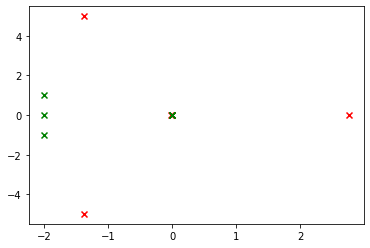

In [32]:
[eigenval, v] = np.linalg.eig(A)
for eig in eigenval:
    print(eig)
plt.scatter(np.real(eigenval), np.imag(eigenval), marker = "x",color ="red")
plt.grid()

print("\n Poles for compensated system")
[eigenval, v] = np.linalg.eig(A-B@K)
for eig in eigenval:
    print(eig)
plt.scatter(np.real(eigenval), np.imag(eigenval), marker = "x",color ="green")
plt.grid()

# Controllability

In [33]:
R = np.hstack([B, A@B, A**2 @ B,A**3 @ B,A**4 @ B, A**5 @ B])
np.linalg.matrix_rank(R)

#OR: 
#import control as ct
#R = ct.ctrb(A, B)

6

## LQR

In [38]:
import scipy as sp
import control as ct
sys = sp.signal.lti(A,B,C,D)

In [44]:
Q = np.array([[10.000, 0.000, 0.000, 0.000, 0.000, 0.000],
              [0.000, 250.000, 0.000, 0.000, 0.000, 0.000],
              [0.000, 0.000, 5.000, 0.000, 0.000, 0.000],
              [0.000, 0.000, 0.000, 0.100, 0.000, 0.000],
              [0.000, 0.000, 0.000, 0.000, 5.000, 0.000],
              [0.000, 0.000, 0.000, 0.000, 0.000, 15.00]])

R = np.array([[0.200, 0.000, 0.000],
              [0.000, 0.200, 0.000],
              [0.000, 0.000, 0.200]])

K, S, E = ct.lqr(sys, Q, R)
K

array([[-3.646, -23.665, -3.539, -1.528, -4.350, -3.847],
       [-3.649, -23.680, 3.533, 1.524, -4.357, -3.858],
       [-4.837, -17.443, 0.002, 0.002, 2.433, 6.664]])

In [40]:
A-B@K

array([[0.000, 1.000, 0.000, 0.000, 0.000, 0.000],
       [-30.048, -68.972, -0.003, -0.001, 0.124, 0.197],
       [0.000, 0.000, 0.000, 1.000, 0.000, 0.000],
       [-0.056, -0.127, -16.902, -6.286, 0.055, 0.089],
       [0.000, 0.000, 0.000, 0.000, 0.000, 1.000],
       [28.778, 65.809, 0.014, 0.004, -14.788, -24.431]])

(-68.82180683955494+0j)
(-23.521192822853788+0j)
(-0.43845010198063505+0j)
(-0.621017840195682+0j)
(-3.1431832297089253+2.650025468541197j)
(-3.1431832297089253-2.650025468541197j)


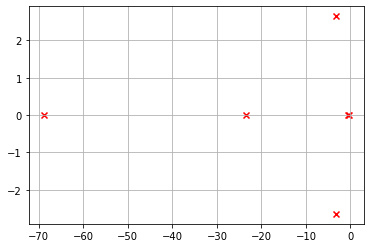

In [37]:
[eigenval, v] = np.linalg.eig(A-B@K)
for eig in eigenval:
    print(eig)
plt.scatter(np.real(eigenval), np.imag(eigenval), marker = "x",color ="red")
plt.grid()